In [2]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [66]:
def imshow_bgr(img):
    plt.imshow(img[:,:,::-1])
    plt.axis("off")

def imshow_gray(img_gray):
    plt.imshow(img_gray, cmap="gray")
    plt.axis("off")

(300, 800, 3)


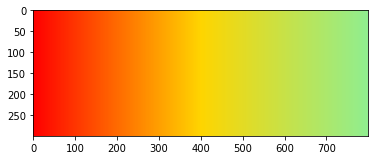

In [18]:
# img = cv2.imread("images/maruff0000.png")
# img = cv2.imread("images/maru00ff00.png")
img = cv2.imread("images/gradation_ff0000_ffd500_90ee90.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv[100, 100]

array([  6, 255, 255], dtype=uint8)

In [6]:
samples = np.linspace(0, 799, 5)
samples = samples.astype(int)
for i in samples:
    color = img[0, i, :]
    print(color)
    print("%02x%02x%02x" % tuple(color))

[255   0   0]
ff0000
[255 105   0]
ff6900
[255 211   0]
ffd300
[200 225  71]
c8e147
[145 238 143]
91ee8f


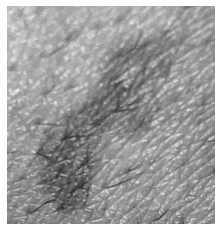

In [67]:
hand = cv2.imread("/home/sonoda/Pictures/hand001.png", 0)
hand = hand[150:800, 230:850]
imshow_gray(hand)

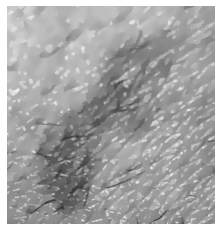

In [76]:
hand_bi = hand
for i in range(50):
    hand_bi = cv2.bilateralFilter(hand_bi, 8, 3, 3)
imshow_gray(hand_bi)